In [29]:
# https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python
# EDA - Exploratory Data Analysis
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('titanic.csv')


#View the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
# Describe the data
# preliminary data analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# Finding duplicates
df.duplicated().sum() # df.duplicated() returns a series of booleans

np.int64(0)

In [34]:
# finding unique values in columns

print(df['Pclass'].unique())

print(df['Survived'].unique())

print(df['Sex'].unique())

[3 1 2]
[0 1]
['male' 'female']


<Axes: xlabel='Pclass', ylabel='count'>

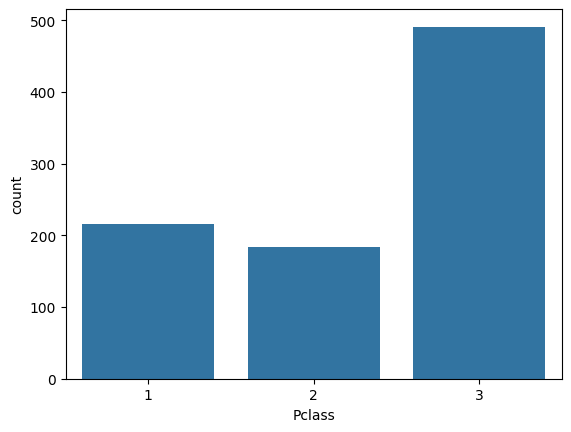

In [35]:
# Plot the unique values
sns.countplot(x='Pclass', data=df)

In [36]:
for value in sorted(df['Pclass'].unique()):
    print(value, len(df[df['Pclass'] == value]))

1 216
2 184
3 491


In [37]:
# Find null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
# Replacing null values
df.replace(np.nan,'0',inplace = True)
# Check the changes now
df.isnull().sum() # should all be zeros

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
# Filter data on certain conditions
df[df['Pclass'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


<Axes: >

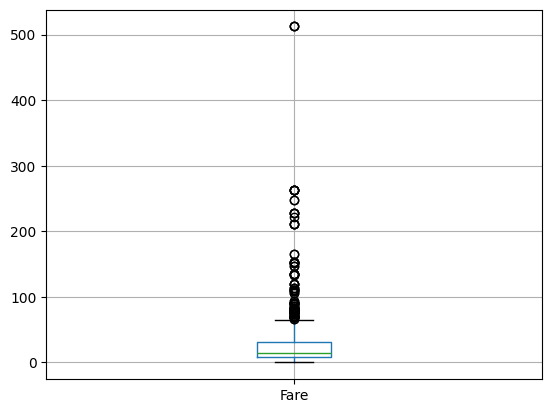

In [42]:
# sample box plot
df[['Fare']].boxplot()

<Axes: xlabel='Pclass', ylabel='Fare'>

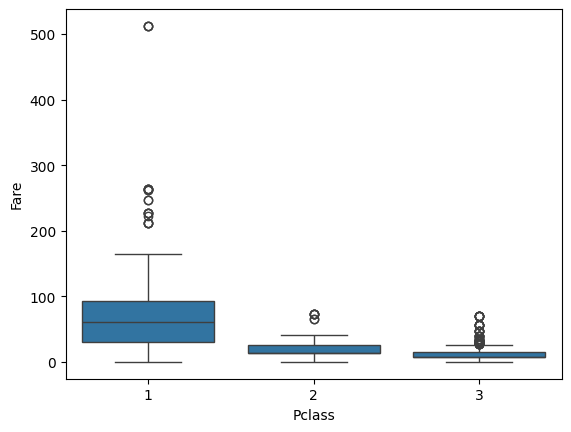

In [45]:
# using seaborn
sns.boxplot(x='Pclass', y='Fare', data=df)

In [49]:
# Find Correlation, correlation co-efficient lies in the range of -1 to 1
df_filtered = df[['Pclass', 'Age', 'Fare', 'Survived']]
df_filtered.corr()

,Pclass,Age,Fare,Survived
Pclass,1.000000,-0.361353,-0.549500,-0.338481
Age,-0.361353,1.000000,0.135516,0.010539
Fare,-0.549500,0.135516,1.000000,0.257307
Survived,-0.338481,0.010539,0.257307,1.000000


<Axes: >

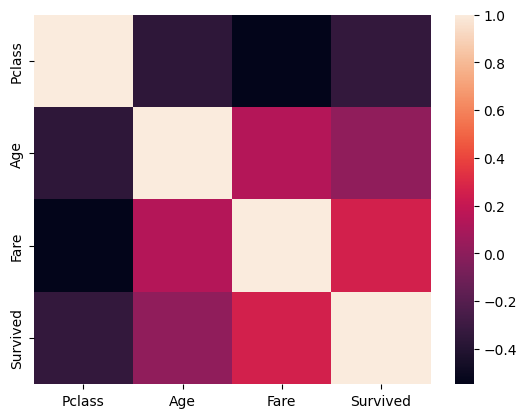

In [50]:
# correlation plot
sns.heatmap(df_filtered.corr())

In [54]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data_filtered = scaler.fit_transform(df_filtered)
normalized_data_filtered

array([[1.        , 0.275     , 0.01415106, 0.        ],
       [0.        , 0.475     , 0.13913574, 1.        ],
       [1.        , 0.325     , 0.01546857, 1.        ],
       ...,
       [1.        , 0.        , 0.04577135, 0.        ],
       [0.        , 0.325     , 0.0585561 , 1.        ],
       [1.        , 0.4       , 0.01512699, 0.        ]], shape=(891, 4))

In [56]:
normalized_df_filtered = pd.DataFrame(normalized_data_filtered, columns=df_filtered.columns)
normalized_df_filtered

,Pclass,Age,Fare,Survived
0,1.0,0.2750,0.014151,0.0
1,0.0,0.4750,0.139136,1.0
2,1.0,0.3250,0.015469,1.0
3,0.0,0.4375,0.103644,1.0
4,1.0,0.4375,0.015713,0.0
...,...,...,...,...
886,0.5,0.3375,0.025374,0.0
887,0.0,0.2375,0.058556,1.0
888,1.0,0.0000,0.045771,0.0
889,0.0,0.3250,0.058556,1.0


In [57]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data_filtered = scaler.fit_transform(df_filtered)
normalized_data_filtered

array([[ 0.82737724, -0.10231279, -0.50244517, -0.78927234],
       [-1.56610693,  0.80749164,  0.78684529,  1.2669898 ],
       [ 0.82737724,  0.12513832, -0.48885426,  1.2669898 ],
       ...,
       [ 0.82737724, -1.35329389, -0.17626324, -0.78927234],
       [-1.56610693,  0.12513832, -0.04438104,  1.2669898 ],
       [ 0.82737724,  0.46631498, -0.49237783, -0.78927234]],
      shape=(891, 4))

In [58]:
normalized_df_filtered = pd.DataFrame(normalized_data_filtered, columns=df_filtered.columns)
normalized_df_filtered

,Pclass,Age,Fare,Survived
0,0.827377,-0.102313,-0.502445,-0.789272
1,-1.566107,0.807492,0.786845,1.266990
2,0.827377,0.125138,-0.488854,1.266990
3,-1.566107,0.636903,0.420730,1.266990
4,0.827377,0.636903,-0.486337,-0.789272
...,...,...,...,...
886,-0.369365,0.182001,-0.386671,-0.789272
887,-1.566107,-0.272901,-0.044381,1.266990
888,0.827377,-1.353294,-0.176263,-0.789272
889,-1.566107,0.125138,-0.044381,1.266990


In [76]:
std_dev = np.sqrt(scaler.var_)
mean = scaler.mean_
print(mean, std_dev)
# Outlier detection
def find_outlier(x, mean, std_dev):
    z_score = (x - mean) / std_dev
    if np.all(z_score < -3.) or np.all(z_score > 3.):
        return True
    else:
        return False
sample_x = np.array([10.4, 120, 1000, 7.3])
find_outlier(sample_x, mean, std_dev)

[ 2.30864198 23.79929293 32.20420797  0.38383838] [ 0.83560193 17.58619695 49.66553444  0.48631932]


True